<a href="https://colab.research.google.com/github/Neetika23/Machine-Learning/blob/master/MNIST_(High_Dimensional_dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Lets first see some basic visualizations

In [1]:
from google.colab import files
uploaded = files.upload()

Saving mnist_train.csv to mnist_train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import io
d0 = pd.read_csv(io.BytesIO(uploaded['mnist_train.csv']))

In [4]:
print(d0.head())

# label is the actual digit, which is been represented.

# save the labels into a variable l.
l = d0['label']  # l stores the class label{0,1,2,3,4...9}

# drop the label feature and store the pixel data in d.
d = d0.drop("label", axis = 1) # d stores data.


   label  pixel0  pixel1  pixel2  ...  pixel780  pixel781  pixel782  pixel783
0      1       0       0       0  ...         0         0         0         0
1      0       0       0       0  ...         0         0         0         0
2      1       0       0       0  ...         0         0         0         0
3      4       0       0       0  ...         0         0         0         0
4      0       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


In [5]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


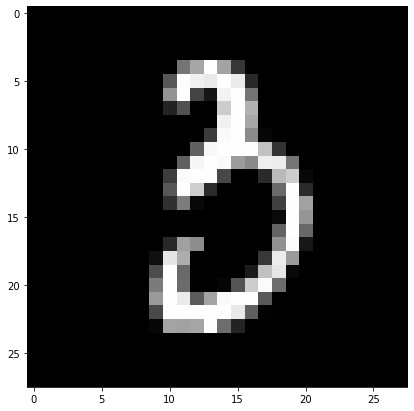

3


In [6]:
# display or plot a number
plt.figure(figsize = (7,7)) #figure size = 7*7.
idx = 150  #index = 100 i.e. d[100]
# I want to visualize 784D data into a grid.

grid_data = d.iloc[idx].to_numpy().reshape(28,28)  
# d.iloc[idx] means get the data of the 100th row from d, convert it into the ndarray matrix and reshape it into 28*28 matrix.

plt.imshow(grid_data, interpolation = 'None', cmap = "gray")
#cmap = color map (for grayscale image)

plt.show()

print(l[idx])  # print what is at 100th index.

In [ ]:
# We see that data has been loaded well. This is how we load mnist data.
# Now, to visulaize, we did 784D --> 2D

##2D Visualization using PCA

In [7]:
# We just pick first 15k data points for simplicity
labels = l.head(15000)
data = d.head(15000)
print(data.shape)

(15000, 784)


In [10]:
# Data-preprocessing: Data Standardization
# We take each column of data xi, subtract mu(i) from it and divide it by sigma(i). This is what data standardization means.
# We use sklearn to do so (using StandardScaler)
# This is basically centering and scaling

from sklearn.preprocessing import StandardScaler
standard_data = StandardScaler().fit_transform(data)
print(standard_data.shape)

(15000, 784)


In [12]:
# Find covariance matrix which is A^T * A.
# A --> 15k*784
sample_data = standard_data

# Here sample_data is our matrix A.
covar_matrix = np.matmul(sample_data.T, sample_data)

print(covar_matrix.shape)

(784, 784)


In [13]:
# Finding the top two eigen-values and corresponding eigen-vectors for projecting in 2D.
from scipy.linalg import eigh

# the parameter 'eigvals'is defined: (low value to high value)
# eigh function will return the eigen values in ascending order
# This code generates only the top 2 (782 and 783) eigen values
# Since we get the eigen values in ascending order using 'eigh' then the top 2 vlaues will be 782th and 783th eigen value. Instead of
# calculating all eigen values we only find the top two.
values, vectors = eigh(covar_matrix, eigvals = (782,783))

print(vectors.shape)
vectors = vectors.T # Transpose for easyness
print(vectors.shape)

(784, 2)
(2, 784)


In [18]:
# Projecting the original data sample on the plane
# formed by two principal eigen vectors by vector-vector multiplication

import matplotlib.pyplot as plt
new_coordinates = np.matmul(vectors, sample_data.T)
# Vectors --> 2*784 and sample_data.T --> 784*15000
# then the new_coordinates --> 2*15000
print(new_coordinates.shape)

(2, 15000)


In [19]:
import pandas as pd

# Appending label to the 2D projected data
# vstack --> vertical stack, I am adding labels to new_coordinates because I need to colr my points using labels.
new_coordinates = np.vstack((new_coordinates, labels)).T

# Creating a new data frame for plotting the labelled points
dataframe = pd.DataFrame(data = new_coordinates, columns = ("1st principal","2nd principal","labels"))
print(dataframe.head())

   1st principal  2nd principal  labels
0      -5.558661      -5.043558     1.0
1       6.193635      19.305278     0.0
2      -1.909878      -7.678775     1.0
3       5.525748      -0.464845     4.0
4       6.366527      26.644289     0.0


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


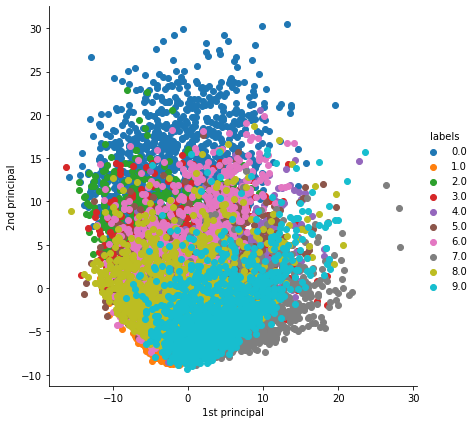

In [20]:
import seaborn as sns
# Scatter plot will be based on 1st and 2nd principal
sns.FacetGrid(dataframe, hue ="labels",size = 6).map(plt.scatter, '1st principal','2nd principal').add_legend()
plt.show()

In [ ]:
# PCA does not do great job in visualizing 784D --> 2D as we can see there is a lot of overlapping
# We did a lot of computations in the above codes, but sklearn allow us to do this all with the simple line of code.

##PCA using sklearn

In [33]:
# Initialising PCA
from sklearn import decomposition
pca = decomposition.PCA()

In [34]:
# Configuring the parameters
# number of components = 2 (for 2D visulaization)
pca.n_components = 2
# All the steps were taken care by sklearn by just single line
pca_data = pca.fit_transform(sample_data)

print(pca_data.shape)

(15000, 2)


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


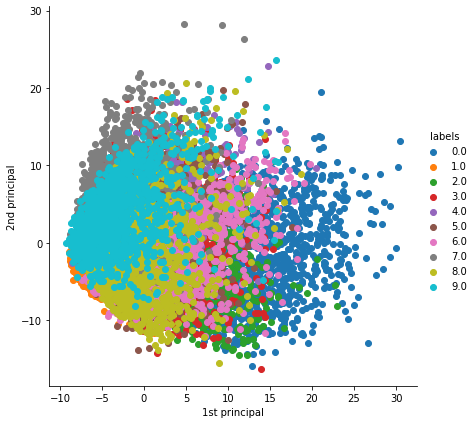

In [35]:
# Attaching the label for each 2d data point
pca_data = np.vstack((pca_data.T, labels)).T

# Creating pca dataframe for plotting
pca_df = pd.DataFrame(data = pca_data, columns = ("1st principal","2nd principal","labels"))
sns.FacetGrid(pca_df, hue="labels", size = 6).map(plt.scatter, '1st principal','2nd principal').add_legend()
plt.show()

##PCA for dimensionality reduction (not Visualization)

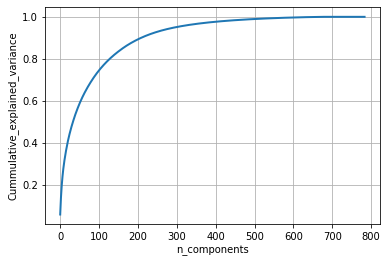

In [36]:
pca.n_components = 784
# So here, I am going from 784D to 784D, i.e from features to principal components
pca_data = pca.fit_transform(sample_data)

# After fit_transform PCA gives a variable named explained_variance. It gives the variance explained(eigen values)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_) # lambda(i)/sigma(lambda(i))

# percentage_var_explained contain lambda(1)/sigma(lambda(i)), lambda(2)/sigma(lambda(i)), lambda(3)/sigma(lambda(i)),...

cum_var_explained = np.cumsum(percentage_var_explained)

# cum_var_explained contain lambda(1)/sigma(lambda(i)), lambda(1+2)/sigma(lambda(i)), lambda(1+2+3)/sigma(lambda(i)),...

# Plot the PCA Spectrum
plt.figure(1, figsize = (6,4))
plt.clf()
plt.plot(cum_var_explained, linewidth = 2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cummulative_explained_variance')
plt.show()

# From the plot we see that 0.2(20%) variance is explained using few feature. If I want to go from 784 --> 100,
# we see that we explain around 0.75(75%{y-axis}) variance.
# 90% variance is explained roughly by 200D.

##t-SNE using sklearn

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


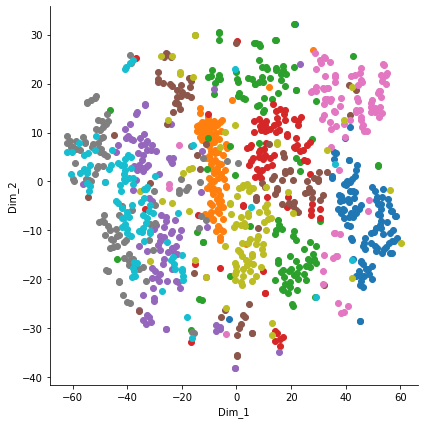

In [40]:
from sklearn.manifold import TSNE

# Pick the top 1000 points as TSNE takes a lot of time for 15K datapoints.
data_tsne = standard_data[0:1000,:]
label_tsne = labels[0:1000]

model = TSNE(n_components=2, random_state=0)

# TSNE is the randomized algorithm due to which we get slightly different result with each run, so to get consistent results,
# we set set value to the random state, if you skip this, outcomes may slightly differ.
# Configuring parameters
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# defaults number of iterations for optimization (step) = 1000

# tsne_data is 2D as we already specified.
tsne_data = model.fit_transform(data_tsne)

tsne_data = np.vstack((tsne_data.T, label_tsne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","labels"))
sns.FacetGrid(tsne_df,hue="labels",size=6).map(plt.scatter, 'Dim_1','Dim_2')
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


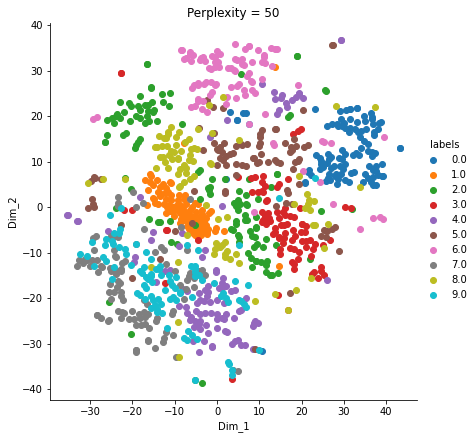

In [44]:
model = TSNE(n_components=2, random_state=0, perplexity=50)
tsne_data = model.fit_transform(data_tsne)

tsne_data = np.vstack((tsne_data.T, label_tsne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df,hue="labels",size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title("Perplexity = 50")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


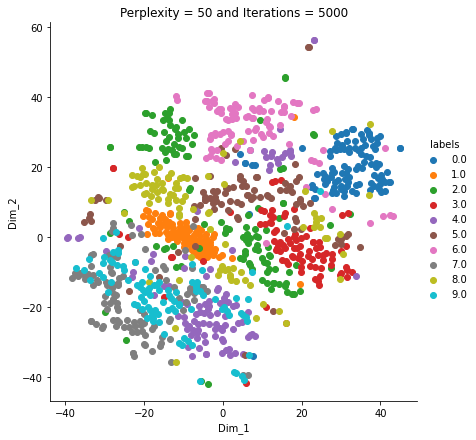

In [45]:
model = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=5000)
tsne_data = model.fit_transform(data_tsne)

tsne_data = np.vstack((tsne_data.T, label_tsne)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("Dim_1","Dim_2","labels"))

sns.FacetGrid(tsne_df,hue="labels",size=6).map(plt.scatter, 'Dim_1','Dim_2').add_legend()
plt.title("Perplexity = 50 and Iterations = 5000")
plt.show()

In [ ]:
# If I take perplexity = 2, then it become a mess.

In [ ]:
# Above plot is way better than pca.